<a href="https://colab.research.google.com/github/egersack/finalproject/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
# Make Strava auth API call with your 
# client_code, client_secret and code
response = requests.post(
                    url = 'https://www.strava.com/oauth/token',
                    data = {
                            'client_id': 80244,
                            'client_secret': '5569506f1befcc383ee1041f3aa7dd8d4551295f',
                            'code': 'a07b1dc071e6609c7aff89db311d3a840f9df99d',
                            'grant_type': 'authorization_code'
                            }
                )
#Save json response as a variable
strava_tokens = response.json()
# Save tokens to file
with open('strava_tokens.json', 'w') as outfile:
    json.dump(strava_tokens, outfile)
# Open JSON file and print the file contents 
# to check it's worked properly
with open('strava_tokens.json') as check:
  data = json.load(check)
print(data)

{'token_type': 'Bearer', 'expires_at': 1648501174, 'expires_in': 21600, 'refresh_token': '9b9d27ee5cd3f33dd0df5190023fc9ae81f9db51', 'access_token': '3b93f87d9d078e320f56ec7ca5365e187eca077e', 'athlete': {'id': 68899871, 'username': 'egersack', 'resource_state': 2, 'firstname': 'Ella', 'lastname': 'Gersack', 'bio': None, 'city': None, 'state': None, 'country': None, 'sex': 'F', 'premium': False, 'summit': False, 'created_at': '2020-09-21T15:05:00Z', 'updated_at': '2021-08-07T20:39:58Z', 'badge_type_id': 0, 'weight': 0.0, 'profile_medium': 'https://lh3.googleusercontent.com/a/AATXAJyU6KDVWeovaORBSqxA1tPDHbIvsQ0mUJhb4Hq7=s96-c', 'profile': 'https://lh3.googleusercontent.com/a/AATXAJyU6KDVWeovaORBSqxA1tPDHbIvsQ0mUJhb4Hq7=s96-c', 'friend': None, 'follower': None}}


In [1]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': "80244",
    'client_secret': '5569506f1befcc383ee1041f3aa7dd8d4551295f',
    'refresh_token': '9b9d27ee5cd3f33dd0df5190023fc9ae81f9db51',
    'grant_type': "refresh_token",
    'f': 'json'
}

print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activites_url, headers=header, params=param).json()

print(my_dataset[0]["name"])
print(my_dataset[0]["map"]["summary_polyline"])

Requesting Token...

Access Token = 766493080447f798ae12e014d83b5bc83dd4c212

Afternoon Run
cqoaG~b}pLF\JHAFHh@Dl@^~ADVBD^rB@^RjB@`@DNBh@ZrBNb@f@tB`@jB@JHPv@dDL`@ZfBVfBJ`AJ`CBN@vAB@IkA@y@KyA[yCUuA[mA?GCCMm@KU]gBK[_@_B@GKSOm@?YGIc@iBg@kFEcAWqASu@AH@HTp@Lr@JtAFRNjC\~BtAtFHd@FLFb@lAfFTtAZxCBrAD\BpACFHzAA^DfB?bCKlDB^BdAI^Ev@KZEx@Ot@Ef@B|@GLD`@APoAtBmA`AUXi@hAGD_@v@Sj@k@lA}AjB]x@aArAKFILm@t@q@h@cAj@oAj@aAVuATmALEA}Ef@gBHiALk@@aAJKHMASD}@D_CFyE?SDi@EED}@CABiAQcHYq@HUCk@DuBd@s@VGF[DyB|@_@Tg@Ps@h@STALMFQTIVWd@Md@MLYjBWjE?tAAVFnAAFHdAANF|A?fBCTAx@Qb@Cb@OZMh@e@z@]d@MJ]h@I@e@Ze@d@}A|@]XMDOPYLu@t@a@h@[TAFW`@UV[d@EPy@bA}@lBQVSl@U`@C@Od@Yn@Kb@Yx@WvAGPEl@EJAj@CL?ZIfCH~BTxBVtAHVLRF^FJBT\\fAzAdArA~ChCVPf@RX?TK^]JYFa@?SS}@GICMOWKa@w@uBI_@Wc@ESQ_@SWEWO_@IIUm@OYK]Yi@M]YoAEq@ES@SEu@@y@DQ?QLkARcA`@sAf@cAt@_An@g@bAm@|@WbCW|AGPFt@K\QNQR]f@Yd@s@DOPc@@[LQnAwEJi@FQBo@EODU?SmDuC]_@IOAIHeA@m@IsCQgD?q@DB@IEQAc@J{BJmARsAz@}BbAsAp@k@r@WTQh@WpA]z@]JAFG\EXMtAQtAAXAR?JFNGnCLb@F~@Er@Pl@@LAdBDrDINDXGbDK`ASx@Cr@Kh@?~BWbACj

In [2]:
import pandas as pd
from pandas.io.json import json_normalize
activities = json_normalize(my_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
#Pandas will be the backbone of our data manipulation.
import pandas as pd
from pandas.io.json import json_normalize
#Seaborn is a data visualization library.
import seaborn as sns
#Matplotlib is a data visualization library. 
#Seaborn is actually built on top of Matplotlib. 
import matplotlib.pyplot as plt
#Numpy will help us handle some work with arrays.
import numpy as np
#Datetime will allow Python to recognize dates as dates, not strings.
from datetime import datetime


In [4]:
activities = json_normalize(my_dataset)
#activities.columns #See a list of all columns in the table
#activities.shape #See the dimensions of the table.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [7]:
#Create new dataframe with only columns I care about
cols = ['name', 'upload_id', 'type', 'distance', 'moving_time',   
         'average_speed', 'max_speed','total_elevation_gain',
         'start_date_local'
       ]
activities = activities[cols]
#Break date into start time and date
activities['start_date_local'] = pd.to_datetime(activities['start_date_local'])
activities['start_time'] = activities['start_date_local'].dt.time
activities['start_date_local'] = activities['start_date_local'].dt.date
activities.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,start_date_local,start_time
0,Afternoon Run,7298032678,Run,11282.0,3242,3.480,5.478,22.3,2022-03-21,00:00:00
1,Lunch Run,7014009908,Run,12099.9,4676,2.588,13.029,22.3,2022-01-28,00:00:00
2,Afternoon Run,6965235864,Run,12582.4,4106,3.064,10.338,22.6,2022-01-19,00:00:00
3,Afternoon Run,6915283782,Run,9973.3,2857,3.491,7.602,24.2,2022-01-10,00:00:00
4,Morning Run,6746517842,Run,10040.6,2877,3.490,4.791,24.2,2021-12-05,00:00:00
5,Afternoon Run,6716785648,Run,12147.6,3553,3.419,5.564,31.4,2021-11-28,00:00:00
6,Morning Run,6716580065,Run,12149.0,3697,3.286,4.958,32.4,2021-11-25,00:00:00
7,Morning Run,6238021423,Run,9666.0,2944,3.283,4.800,17.7,2021-08-28,00:00:00
8,Afternoon Run,6233156433,Run,5353.8,1769,3.026,4.800,0.0,2021-08-13,00:00:00
9,Morning Run,6047168307,Run,10167.6,3280,3.100,5.500,205.9,2021-07-25,00:00:00


In [8]:
runs = activities.loc[activities['type'] == 'Run']

Text(0.5, 1.0, 'Average Speed vs Distance')

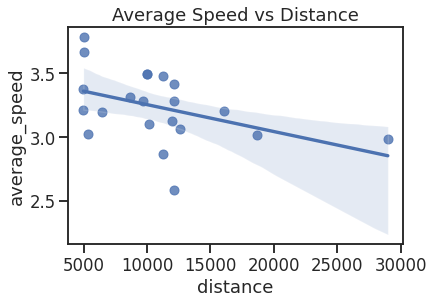

In [9]:
sns.set(style="ticks", context="talk")
sns.regplot(x='distance', y = 'average_speed', data = runs).set_title("Average Speed vs Distance")

Text(0.5, 1.0, 'Max Speed vs Distance')

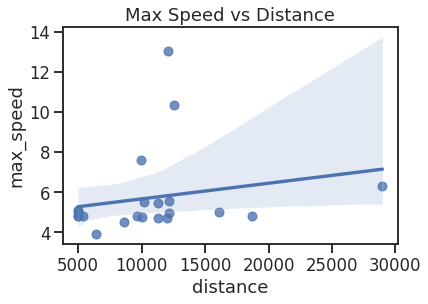

In [10]:
sns.set(style="ticks", context="talk")
sns.regplot(x='distance', y = 'max_speed', data = runs).set_title("Max Speed vs Distance")

NameError: ignored

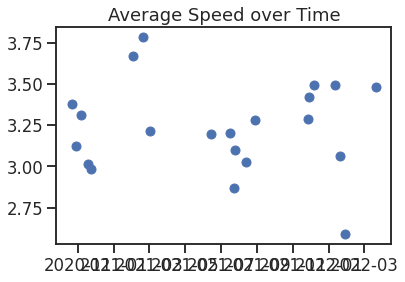

In [12]:
fig = plt.figure() #create overall container
ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure
x = np.asarray(runs.start_date_local)  #convert data to numpy array
y = np.asarray(runs.average_speed)
ax1.plot_date(x, y) #plot data points in scatter plot on ax1
ax1.set_title('Average Speed over Time')
#ax1.set_ylim([0,5])
#add trend line
x2 = mdates.date2num(x)
z=np.polyfit(x2,y,1)
p=np.poly1d(z)
plt.plot(x,p(x2),'r--')
#format the figure and display
fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()